# TP5 - VpC1
### Andrés Merli

- Implementar el detector de fondo naive usando la mediana como
estimador. El algoritmo debe recibir el parámetro N (cantidad de
frames utilizados para la estimación) y el intervalo de tiempo para
recalcular el fondo.
- Se deben generar las mascaras de foreground y aplicarlas a los frames
para segmentar los objetos en movimiento.
- Comparar con alguno de los métodos vistos en la practica basados en
mezcla de gaussianas

In [10]:
#%matplotlib inline  

import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt

In [3]:
#filename = 'vtest.avi'
filename = 'slow_traffic_small.mp4'
capture = cv.VideoCapture(filename)

In [4]:
# verificamos función para obtener cantidad de frames
capture.get(cv.CAP_PROP_FRAME_COUNT)

914.0

#### Código que calcula el background a partir de la mediana de una grupo N aleatorio de frames

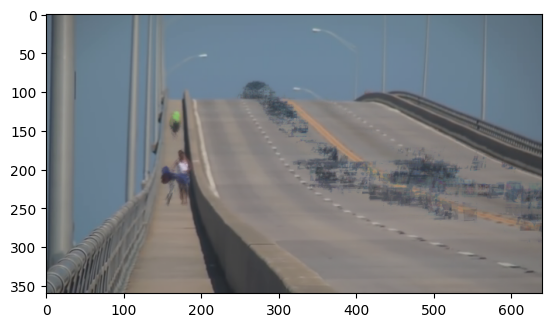

-1

In [26]:
#filename = 'vtest.avi'
filename = 'slow_traffic_small.mp4'
capture = cv.VideoCapture(filename)

n_frames = 30
frames_list = []

if not capture.isOpened:
    print('Falla al abrir el archivo: ' + filename)
    exit(0)

# Seleccionamos n_frames de forma aleatoria

random_list = random.sample(range(int(capture.get(cv.CAP_PROP_FRAME_COUNT))), n_frames)
#frameIds = capture.get(cv.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=50)

# Store selected frames in an array

for n in random_list:
    capture.set(cv.CAP_PROP_POS_FRAMES, n)
    ret, frame = capture.read()
    frames_list.append(frame)
frames_array = np.array(frames_list)

# Calculamos la mediana del grupo de n_frames
background_model = np.median(frames_array, axis=0).astype(dtype=np.uint8) 

# Mostramos simplemente el modelo de fondo creado por pantalla y en la notebook

plt.imshow(cv.cvtColor(background_model, cv.COLOR_BGR2RGB))
plt.show()

cv.imshow('frame', background_model)
cv.waitKey()



#### Generamos las máscaras y aplicamos a los frames para segementar los objetos en movimiento

In [27]:
# Reseteamos el numero de frame
capture.set(cv.CAP_PROP_POS_FRAMES, 0)

# Corremos la sustraccion
#------------------------

while True:
    # Leemos un frame
    ret, frame = capture.read()
    if frame is None:
        break
    
    #Convertimos a escala de grises
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    background_model_gray = cv.cvtColor(background_model, cv.COLOR_BGR2GRAY)

    # Aplicamos la sustracción del background al frame leído
    #----------------------------------------
    foreground = cv.absdiff(frame_gray, background_model_gray)
    
    #Aplicamos binarización
    ret, fgMask = cv.threshold(foreground,40,255,cv.THRESH_BINARY)
        
    # Escribimos sobre la imagen el número de frame procesado
    cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    # mostramos frame original e imagen binaria background/foreground
    cv.imshow('Frame', frame)
    cv.imshow('FG Mask', fgMask)
    
    # Corresmos hasta que termine o apriete escape
    keyboard = cv.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

cv.destroyAllWindows()
capture.release()


### Creamos la función que tome los parámetros de n_frames y tiempo de recalculo

In [163]:
def sustraccion_fondo_medianas(filename, n_frames, delta):
    
    capture = cv.VideoCapture(filename)
    frames_list = []

    if not capture.isOpened:
        print('Falla al abrir el archivo: ' + filename)
        exit(0)

    # Seleccionamos n_frames de forma aleatoria
    random_list = random.sample(range(int(capture.get(cv.CAP_PROP_FRAME_COUNT))), n_frames)
    
    # Store selected frames in an array
    for n in random_list:
        capture.set(cv.CAP_PROP_POS_FRAMES, n)
        ret, frame = capture.read()
        frames_list.append(frame)
    
    frames_array = np.array(frames_list)
    
    # Calculamos la mediana del grupo de n_frames
    background_model = np.median(frames_array, axis=0).astype(dtype=np.uint8) 
    
    # Mostramos simplemente el modelo de fondo creado por pantalla y en la notebook
    plt.imshow(cv.cvtColor(background_model, cv.COLOR_BGR2RGB))
    plt.show()

    cv.imshow('frame', background_model)
    cv.waitKey()

    # Reseteamos el numero de frame
    capture.set(cv.CAP_PROP_POS_FRAMES, 0)

    # Corremos la sustraccion
    #------------------------

    while True:
        # Leemos un frame
        ret, frame = capture.read()
        if frame is None:
            break
        
        #Convertimos a escala de grises
        frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        background_model_gray = cv.cvtColor(background_model, cv.COLOR_BGR2GRAY)

        # Aplicamos la sustracción del background al frame leído
        #----------------------------------------
        foreground = cv.absdiff(frame_gray, background_model_gray)
        
        #Aplicamos binarización
        ret, fgMask = cv.threshold(foreground,40,255,cv.THRESH_BINARY)
            
        # Escribimos sobre la imagen el número de frame procesado
        cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
        cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
                cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
        
        # mostramos frame original e imagen binaria background/foreground
        cv.imshow('Frame', frame)
        cv.imshow('FG Mask', fgMask)
        
        # Corresmos hasta que termine o apriete escape
        keyboard = cv.waitKey(30)
        if keyboard == 'q' or keyboard == 27:
            break

    cv.destroyAllWindows()
    capture.release()
